In [2]:
import importlib
import Functions  
importlib.reload(Functions)
from Functions import *


Test process image

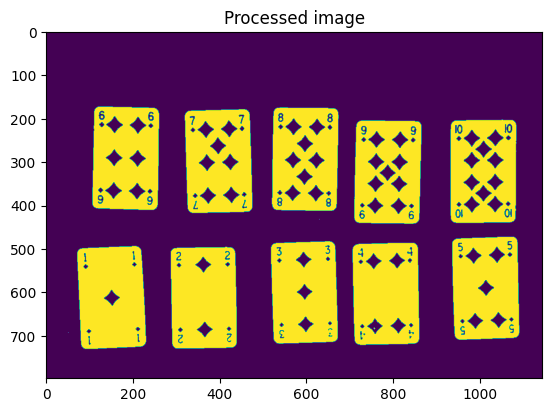

In [3]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/D1.jpg')
image2 = Process_image(image)
plt.imshow(image2)
plt.title('Processed image')
plt.show()

Draw contours on cards

In [ ]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/H1.jpg')
cards, output= Find_cards(image)
print(len(cards))
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.title('Find cards')
plt.show()

Test to show all contours

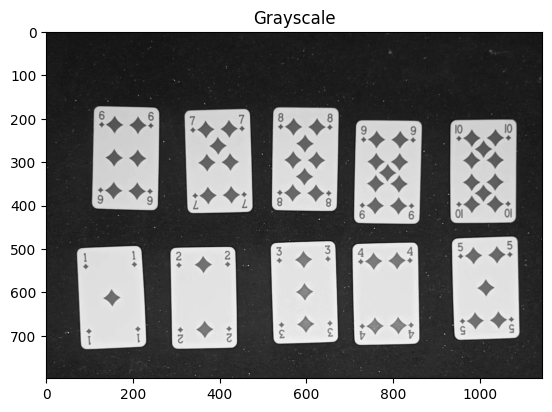

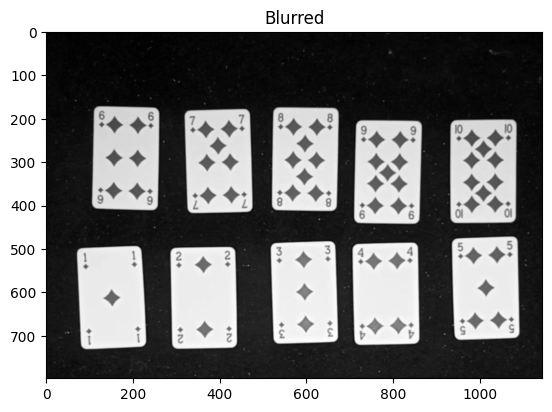

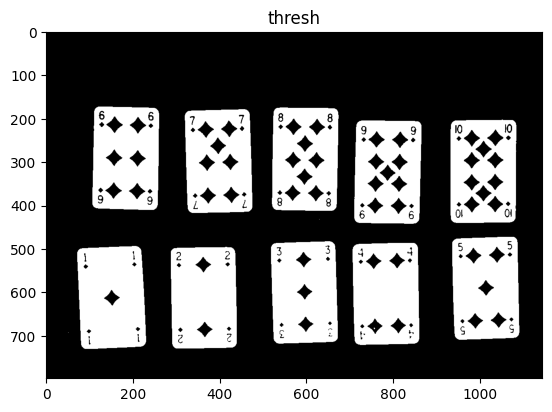

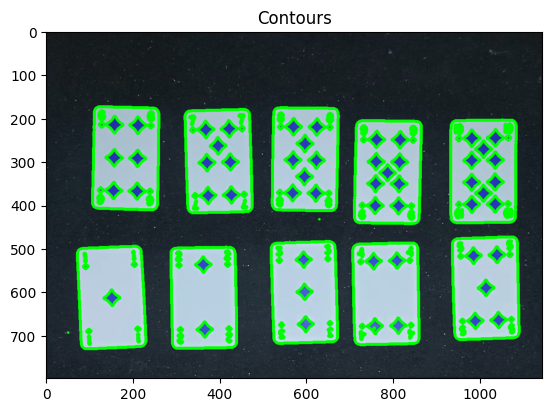

In [5]:
image = cv2.imread('Full family/D1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)


retval, thresh = cv2.threshold(blur,THRESH_LVL,255,cv2.THRESH_BINARY)

# Find contours and their hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
cv2.drawContours(image, contours, -1, (0, 255, 0), 5)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.show()

plt.imshow(blur, cmap='gray')
plt.title('Blurred')
plt.show()

plt.imshow(thresh, cmap='gray')
plt.title('thresh')
plt.show()

# Afficher l'image avec les contours
plt.imshow(image)
plt.title('Contours')
plt.show()


Isolate card

In [ ]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/H1.jpg')
cards, output= Find_cards(image)
card= Process_Card(cards[1], image)

plt.imshow(card.img)
plt.title('Test')
plt.show()

dest_path = './Cards/'
#Save_template_cards(card.img, dest_path, "Test")  # Save with unique name

Save templates

In [19]:
importlib.reload(Functions)
from Functions import *
folder_path = './Full Family/'
dest_path = './Cards/'


for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Read the image
        image = cv2.imread(file_path)

        # Skip if the image cannot be loaded
        if image is None:
            print(f"Skipping {filename}: unable to read the image.")
            continue

        # Find cards in the image
        cards, output = Find_cards(image)

        # Process and save each card
        for i, card_info in enumerate(cards):
            card = Process_Card(card_info, image)  # Process the card
            Save_template_cards(card.img, dest_path, f"{os.path.splitext(filename)[0]}_card_{i}")  # Save with unique name

Load templates

AH
11


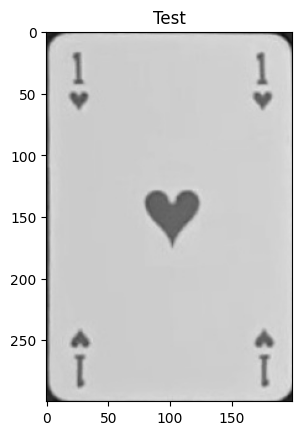

In [7]:
importlib.reload(Functions)
from Functions import *
templates = Load_Templates('Cards/')
img = templates[0].img
print(templates[0].rank)
print(templates[0].value)
plt.imshow(img)
plt.title('Test')
plt.show()

Comparison between the templates and the cards

In [ ]:
importlib.reload(Functions)
from Functions import *

templates = Load_Templates('Cards/')
img = templates[1].img

image = cv2.imread('Full family/H1.jpg')
cards, output= Find_cards(image)
card = Process_Card(cards[0], image) 
img2 = card.img


diff = compute_diff_score(img,img2)
print(diff)




Find matching corner 

10
10
10


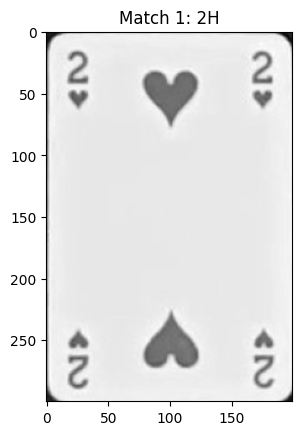

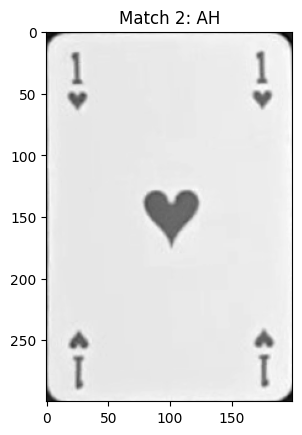

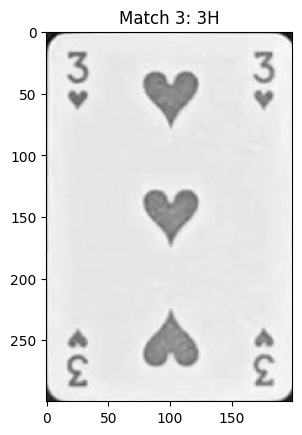

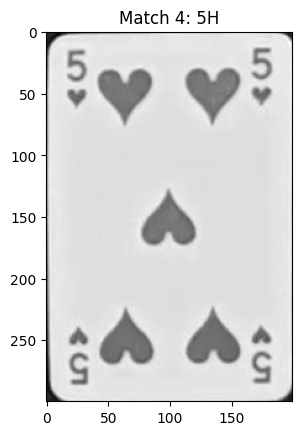

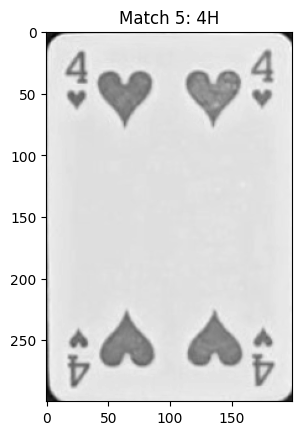

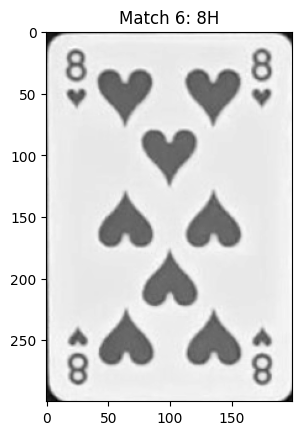

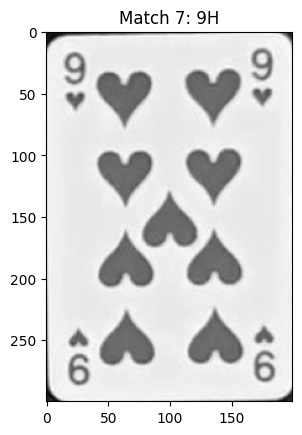

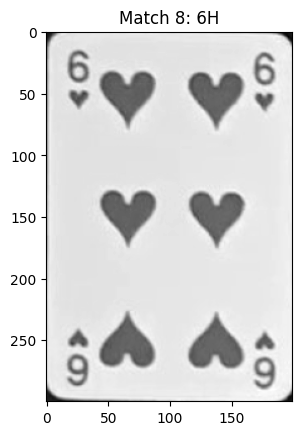

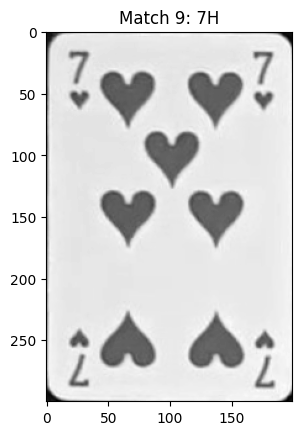

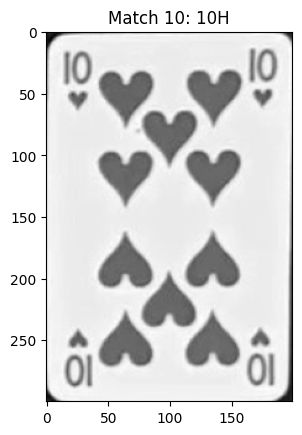

In [5]:
importlib.reload(Functions)
from Functions import *


templates = Load_Templates('Cards/')

image = cv2.imread('Full family/H1.jpg')
cards_contours, output = Find_cards(image)
print(len(cards_contours))

matching_cards, cards_found = Match_Cards(cards_contours, image , templates)

print(len(cards_found))
print(len(matching_cards))

for i, card in enumerate(matching_cards):
    plt.imshow(card.img, cmap='gray')
    plt.title(f'Match {i + 1}: {card.rank}')
    plt.show()



Draw results on image

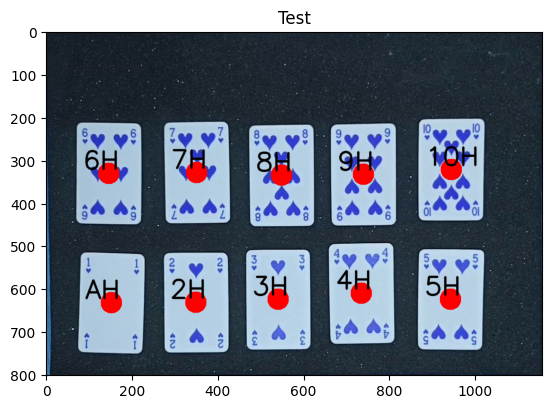

In [6]:
importlib.reload(Functions)
from Functions import *
for i, card in enumerate(cards_found):

    result_image = draw_results(image, card)

plt.imshow(result_image)
plt.title('Test')
plt.show()